In [64]:
import logging
import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

from IPython.display import Image
from IPython.core.display import HTML

In [65]:
logging.basicConfig(format='%(asctime)s %(levelname)s %(name)s %(message)s', level=logging.DEBUG)
mpl=logging.getLogger('matplotlib')
mpl.setLevel(logging.WARNING)

In [6]:
%load_ext autoreload
%autoreload 2

In [770]:
from dwd_forecast import DWD
from weather_plot import DwdForecastPlot

In [771]:
d=DWD()

In [772]:
sl=d.read_station_list()

2020-03-29 14:04:51,738 DEBUG DWD Read station list ./cache/station-list.json from cache


In [773]:
sl.head()

,Stationsname,Stations_ID,Kennung,Stations-kennung,Breite,Länge,Stations-höhe,Flussgebiet,Bundesland,Beginn,Ende,BeginnDT,EndeDT
0,Aach,1,KL,02783,47.8410,8.8490,478,NaN,BW,01.01.1937,30.06.1986,1937-01-01,1986-06-30
1,Aach,1,RR,70191,47.8410,8.8490,478,NaN,BW,01.01.1912,30.06.1986,1912-01-01,1986-06-30
2,Aach/Hegau,10771,PE,10771,47.8500,8.8500,480,NaN,BW,None,None,NaT,NaT
3,Aachen,3,EB,02205,50.7827,6.0941,202,803100.0,NW,01.01.1951,31.03.2011,1951-01-01,2011-03-31
4,Aachen,3,FF,02205,50.7827,6.0941,202,803100.0,NW,01.01.1937,31.03.2011,1937-01-01,2011-03-31


In [774]:
dwc=d.station_forecast('10865')

2020-03-29 14:04:52,363 DEBUG DWD Station forecast 10865 read from cache ./cache/station-forecast-10865.json


In [775]:
dwc.head()

,PPPP,E_PPP,TX,TTT,E_TTT,Td,E_Td,TN,TG,TM,...,RRad1,Rad1h,SunD1,SunD3,PEvap,WPc11,WPc31,WPc61,WPch1,WPcd1
2020-03-29 10:00:00,101820,20,NaN,281.15,0.5,272.65,0.6,NaN,NaN,NaN,...,NaN,NaN,900,1380.0,NaN,3.0,NaN,NaN,NaN,NaN
2020-03-29 11:00:00,101780,40,NaN,281.55,0.5,272.75,0.8,NaN,NaN,NaN,...,NaN,NaN,960,2040.0,NaN,3.0,NaN,NaN,NaN,NaN
2020-03-29 12:00:00,101740,50,NaN,281.45,0.8,272.65,0.8,NaN,NaN,NaN,...,NaN,NaN,960,2700.0,NaN,3.0,3.0,3.0,NaN,NaN
2020-03-29 13:00:00,101740,50,NaN,281.25,0.9,272.65,0.9,NaN,NaN,NaN,...,NaN,NaN,660,2160.0,NaN,3.0,NaN,NaN,NaN,NaN
2020-03-29 14:00:00,101760,60,NaN,280.45,0.9,272.95,1.0,NaN,NaN,NaN,...,NaN,NaN,480,1620.0,NaN,61.0,NaN,NaN,NaN,NaN


In [776]:
my_lat, my_lon=(48.15, 11.56)

In [777]:
nearest=d.get_closest(my_lat,my_lon)
print(nearest)

2020-03-29 14:04:54,448 DEBUG root Station 04124 fails
2020-03-29 14:04:54,570 DEBUG root Station 04124 fails
2020-03-29 14:04:54,699 DEBUG root Station 04124 fails


('10865', 'München-Stadt', Distance(1.9339969383980125))


In [778]:
# sns.set()
# matplotlib.rc_file_defaults()

In [779]:
wp=DwdForecastPlot()

2020-03-29 14:04:54,945 DEBUG DWD Station forecast 10865 read from cache ./cache/station-forecast-10865.json


<Figure size 800x480 with 0 Axes>

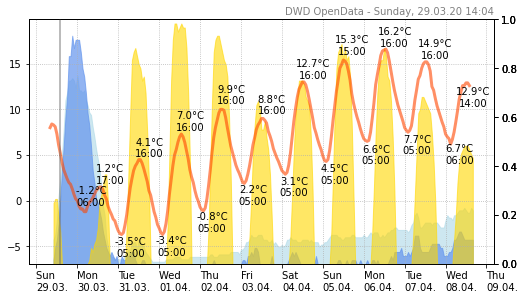

In [780]:
ax1=wp.plot("10865",image_file='weather.png', close_plot=False)
# Image('weather.png')

In [ ]:
from ipyleaflet import Map, Marker, MarkerCluster, AwesomeIcon

In [212]:
icon_home = AwesomeIcon(
    name='home',
    marker_color='blue',
    icon_color='black',
    spin=False
)
icon_station = AwesomeIcon(
    name = 'thermometer-4',
    marker_color='blue',
    icon_color='black',
    spin=False
)


In [213]:
home=(my_lat,my_lon)
center=(min(sl['Breite'])+(max(sl['Breite'])-min(sl['Breite']))/2, min(sl['Länge'])+(max(sl['Länge'])-min(sl['Länge']))/2)
m=Map(center=center, zoom=8)

In [214]:
marker = Marker(location=home, icon=icon_home, draggable=False, title="DWD weather station")
m.add_layer(marker);

display(m)

Map(center=[51.141000000000005, 10.469999999999999], controls=(ZoomControl(options=['position', 'zoom_in_text'…

In [215]:
min(sl['Breite'])

47.271

In [216]:
max(sl['Breite'])

55.011

In [217]:
import pandas as pd

In [218]:
stations=[]
for i in range(len(sl)):
    if d._is_uptodate(i) is True:
        stations.append((sl['Breite'][i], sl['Länge'][i], sl['Stationsname'][i], sl['Kennung'][i], sl['Stations-kennung'][i], sl['Ende'][i]))

In [219]:
len(stations)

5910

In [220]:
len(sl)

18676

In [221]:
import time
import datetime

In [222]:
stations[:10]

[(50.75, 6.186, 'Aachen-Brand (WV NRW)', 'MN', 'H808', '28.03.2020'),
 (50.75, 6.186, 'Aachen-Brand (WV NRW)', 'RR', '87411', '27.03.2020'),
 (50.798, 6.024, 'Aachen-Orsbach', 'EB', '02206', '27.03.2020'),
 (50.798, 6.024, 'Aachen-Orsbach', 'FF', '02206', '27.03.2020'),
 (50.798, 6.024, 'Aachen-Orsbach', 'KL', '02206', '27.03.2020'),
 (50.798, 6.024, 'Aachen-Orsbach', 'MN', '10505', '28.03.2020'),
 (50.798, 6.024, 'Aachen-Orsbach', 'RR', '80311', '27.03.2020'),
 (50.798, 6.024, 'Aachen-Orsbach', 'SO', '02206', '27.03.2020'),
 (50.798, 6.024, 'Aachen-Orsbach', 'SY', '10505', '27.03.2020'),
 (50.798, 6.024, 'Aachen-Orsbach', 'TU', '02206', '27.03.2020')]

In [223]:
dt=(datetime.datetime.now()-sl['EndeDT'][3]).total_seconds()

In [224]:
from urllib.request import urlopen

In [225]:
def get_forecast_stations():
    url='https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_L/single_stations'
    try:
        resp=urlopen(url)
        data=resp.read()
    except Exception as e:
        logging.error(f"Failed to download {url}: {e}")
        return None
    return data

In [226]:
data=get_forecast_stations()

In [227]:
from bs4 import BeautifulSoup

In [228]:
soup = BeautifulSoup(data, 'html.parser')
raw_stations = []
for a in soup.find_all('a', href=True): 
    if a.text: 
        raw_stations.append(a['href'][:-1])
raw_stations=raw_stations[1:]

In [229]:
raw_stations[:10]

['01001',
 '01008',
 '01025',
 '01028',
 '01049',
 '01052',
 '01059',
 '01089',
 '01092',
 '01112']

In [230]:
len(raw_stations)

5899

In [231]:
val_stations=[]
for i in range(len(sl)):
    val_stations.append(sl['Stations-kennung'][i])

In [232]:
len(val_stations), len(raw_stations)

(18676, 5899)

In [233]:
vir=[]
riv=[]
for i in range(len(val_stations)):
    if val_stations[i] in raw_stations:
        if val_stations[i] not in vir:
            vir.append(val_stations[i])
for i in range(len(raw_stations)):
    if raw_stations[i] in val_stations:
        riv.append(raw_stations[i])
vir=sorted(vir)
riv=sorted(riv)

In [234]:
len(vir), len(riv)

(1750, 1750)

In [235]:
markers=[]
done=[]
for i in range(len(sl)):
    kenn=sl['Stations-kennung'][i]
    name=sl['Stationsname'][i]
    if (kenn in vir) and (name not in done):
        done.append(name)
        marker = Marker(location=(sl['Breite'][i], sl['Länge'][i]), icon=icon_station, draggable=False, title=f"{name}, id={kenn}")
        markers.append(marker)

In [236]:
len(markers)

1965

In [237]:
marker_cluster = MarkerCluster(
    markers=markers
)

In [238]:
m.add_layer(marker_cluster)

In [239]:
m

Map(center=[51.141000000000005, 10.469999999999999], controls=(ZoomControl(options=['position', 'zoom_in_text'…